# Import necessary modules 

In [1]:
%matplotlib inline
import numpy as np
import tifffile
import matplotlib.pyplot as plt
from ganrectf.utils import angles, nor_tomo
from ganrectf.ganrec_diffuser import GANtomo


# Read the data 

In [2]:
prj = tifffile.imread('./test_data/tooth.tiff')
nang, px = prj.shape
ang = angles(nang)
prj = nor_tomo(prj)

# Reconstruct the data with the ganrec algorithm

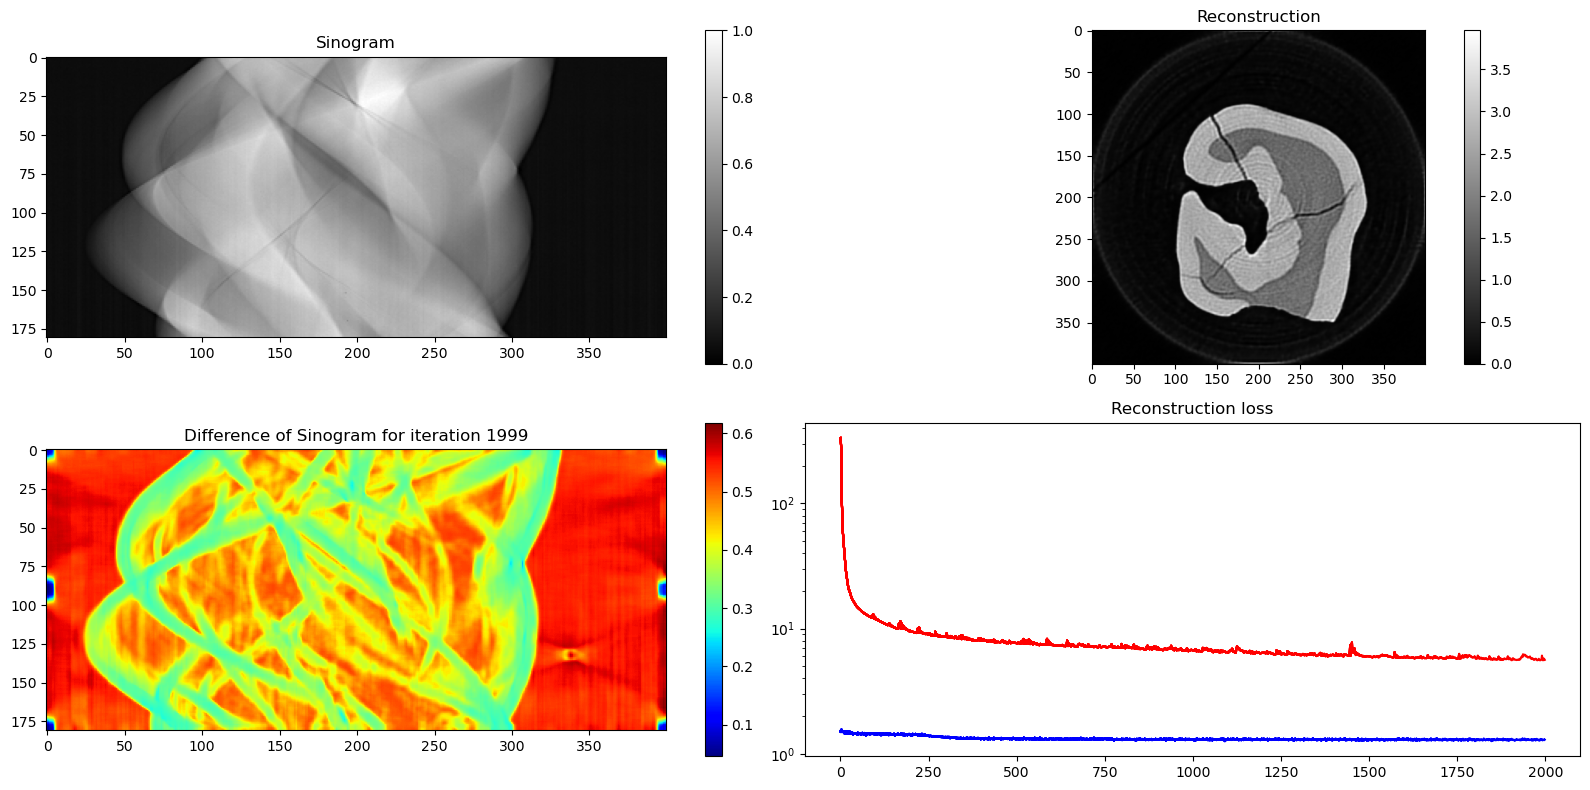

<Figure size 640x480 with 0 Axes>

Reconstruction Progress: 100%|█████████▉| 1999/2000 [00:54<00:00, 46.79it/s, D_loss=1.3, G_loss=5.67]

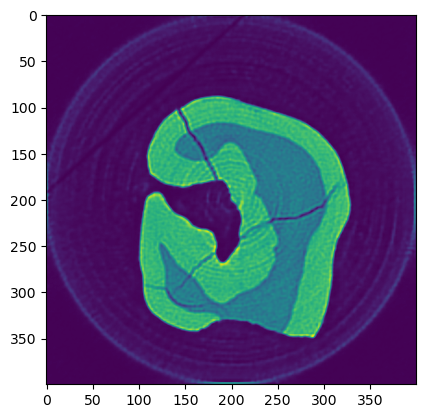

Reconstruction Progress: 100%|██████████| 2000/2000 [01:11<00:00, 46.79it/s, D_loss=1.3, G_loss=5.67]

In [4]:
rec = GANtomo(prj, ang, iter_num=2000).recon
plt.imshow(rec)
plt.show()
tifffile.imwrite('./test_results/recon_tooth.tiff', rec)